In [48]:
import pandas as pd
import seaborn as sns
import matplotlib
from numpy import median
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('TB_Burden_Country.csv')

In [4]:
data.head()

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN


# Summary of Data

## Histogram

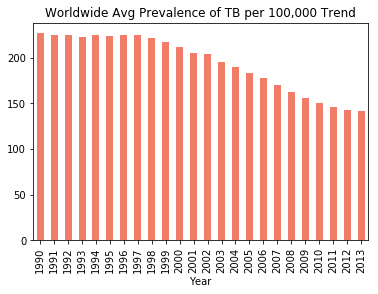

In [41]:
data.groupby('Year')['Estimated prevalence of TB (all forms) per 100 000 population'].mean()\
.plot(kind='bar', color = '#F17C67', title ='Worldwide Avg Prevalence of TB per 100,000 Trend')

## Barplot

In [19]:
df = data[['Region','Year','Estimated prevalence of TB (all forms) per 100 000 population']]

In [20]:
df.head()

,Region,Year,Estimated prevalence of TB (all forms) per 100 000 population
0,EMR,1990,306.0
1,EMR,1991,343.0
2,EMR,1992,371.0
3,EMR,1993,392.0
4,EMR,1994,410.0


/Users/minchenwang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


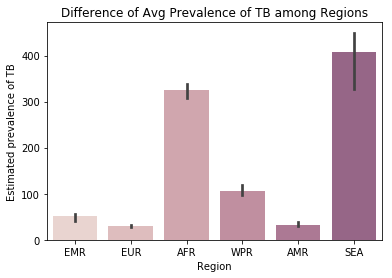

In [55]:
fig, ax = plt.subplots()
g = sns.barplot(x="Region", y="Estimated prevalence of TB (all forms) per 100 000 population", 
                 data=df, estimator=median, palette= sns.cubehelix_palette(10),ax=ax)
ax.set_ylabel("Estimated prevalence of TB")
ax.set_title('Difference of Avg Prevalence of TB among Regions')
fig.show()

## Scatterplot

/Users/minchenwang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


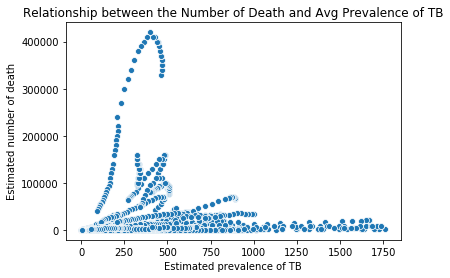

In [67]:
fig, ax = plt.subplots()
g = sns.scatterplot(y="Estimated number of deaths from TB (all forms, excluding HIV)",
                    x="Estimated prevalence of TB (all forms) per 100 000 population", data=data, ax=ax)
ax.set_xlabel("Estimated prevalence of TB")
ax.set_ylabel("Estimated number of death")
ax.set_title('Relationship between the Number of Death and Avg Prevalence of TB')
fig.show()

## Connection Map

In [77]:
max_ = pd.DataFrame(data.groupby('Year')['Estimated prevalence of TB (all forms) per 100 000 population'].max()).reset_index()

In [87]:
max_change = pd.merge(left=max_,right=data[['Year','Estimated prevalence of TB (all forms) per 100 000 population','Country or territory name','Region']],
         on=['Year','Estimated prevalence of TB (all forms) per 100 000 population'])

In [88]:
max_change.head()

,Year,Estimated prevalence of TB (all forms) per 100 000 population,Country or territory name,Region
0,1990,1762.0,Bhutan,SEA
1,1991,1679.0,Central African Republic,AFR
2,1992,1714.0,Central African Republic,AFR
3,1993,1736.0,Central African Republic,AFR
4,1994,1736.0,Central African Republic,AFR


In [89]:
max_change['Next Country'] = max_change['Country or territory name'].shift(-1)

In [97]:
import numpy as np

In [98]:
max_change['Order'] = np.arange(len(max_change))

In [99]:
max_change.head()

,Year,Estimated prevalence of TB (all forms) per 100 000 population,Country or territory name,Region,Next Country,Order
0,1990,1762.0,Bhutan,SEA,Central African Republic,0
1,1991,1679.0,Central African Republic,AFR,Central African Republic,1
2,1992,1714.0,Central African Republic,AFR,Central African Republic,2
3,1993,1736.0,Central African Republic,AFR,Central African Republic,3
4,1994,1736.0,Central African Republic,AFR,Central African Republic,4


In [100]:
max_change.to_csv('ConnectionMap.csv',index=False)

## Heatmap

In [106]:
df2 = data.groupby(["Year","Region"])['Estimated prevalence of TB (all forms) per 100 000 population'].mean().reset_index()

In [108]:
df2.head()

,Year,Region,Estimated prevalence of TB (all forms) per 100 000 population
0,1990,AFR,417.130435
1,1990,AMR,84.428889
2,1990,EMR,183.545455
3,1990,EUR,84.181132
4,1990,SEA,550.300000


In [109]:
df2 = df2.pivot("Year", "Region", "Estimated prevalence of TB (all forms) per 100 000 population")

/Users/minchenwang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


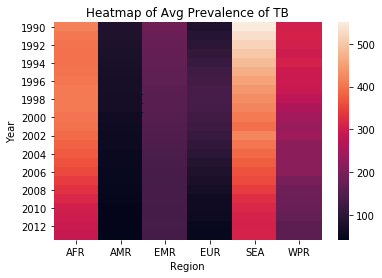

In [111]:
fig, ax = plt.subplots()
g = sns.heatmap(df2, ax=ax)
ax.set_title('Heatmap of Avg Prevalence of TB')
fig.show()
